In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import datetime

In [5]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [6]:
# reflect an existing database into a new model
Base  = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
    ##<Personal comment> class sqlalchemy.ext.automap.AutomapBase
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
inspector = inspect(engine)
for column in inspector.get_columns('measurement'):
    print('Measurement',column['name'], column['type'])
    inspector = inspect(engine)
print('\n')
for column in inspector.get_columns('station'):
    print('Stations',column['name'], column['type'])


Measurement id INTEGER
Measurement station TEXT
Measurement date TEXT
Measurement prcp FLOAT
Measurement tobs FLOAT


Stations id INTEGER
Stations station TEXT
Stations name TEXT
Stations latitude FLOAT
Stations longitude FLOAT
Stations elevation FLOAT


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#OHAU 21.45521,-157.99800
result=session.query(Station.id,Station.station,Station.name,Station.elevation).all()
df = pd.DataFrame(result, columns=['id','station','name','elevation'])
df.set_index(df['id'],inplace=True)
print(df.to_string(index=False))

 id     station                                   name  elevation
  1 USC00519397                   WAIKIKI 717.2, HI US        3.0
  2 USC00513117                   KANEOHE 838.1, HI US       14.6
  3 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US        7.0
  4 USC00517948                      PEARL CITY, HI US       11.9
  5 USC00518838             UPPER WAHIAWA 874.3, HI US      306.6
  6 USC00519523     WAIMANALO EXPERIMENTAL FARM, HI US       19.5
  7 USC00519281                    WAIHEE 837.5, HI US       32.9
  8 USC00511918      HONOLULU OBSERVATORY 702.2, HI US        0.9
  9 USC00516128           MANOA LYON ARBO 785.2, HI US      152.4


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

start_day = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
    #<Personal Additional comment> class datetime.timedelta(days=0, seconds=0, microseconds=0, 
    # milliseconds=0, minutes=0, hours=0, weeks=0)¶

prev_year = start_day - dt.timedelta(days= 365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=prev_year).all()

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results,columns=['date','precipitation'])
df.set_index(df['date'],inplace=True)

# Sort the dataframe by date

df.sort_index(inplace =True)
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

Text(0.5, -35.60003781598188, 'Dates')

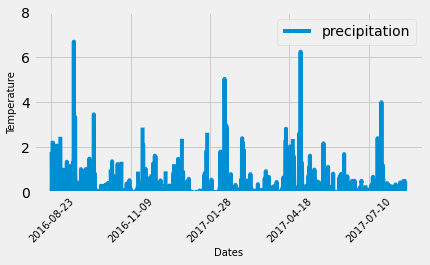

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data


df.plot()
plt.xticks(rotation = 45, size=10) #
plt.tight_layout()
plt.ylim(0,8)
plt.ylabel('Temperature', size=10)
plt.xlabel('Dates', size=10)


## One trend we can observe based on this plot is that some months have higher amounts of precipitation than others.

Here's a refresher on some key concepts in statistics:

Mean: the average, which you can find by adding up all the numbers in a dataset and dividing by the number of numbers.
Variance: how far a set of numbers is from the average.
Standard deviation: a measure of how spread out the numbers in a dataset are; the square root of the variance.
Minimum: the smallest number in a dataset.
Maximum: the largest number in a dataset.
Percentiles: where the number is in relation to the rest of the set of data.
Count: the total number of numbers or items in a dataset.

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## This data gives us a summary of different statistics for the amount of precipitation in a year. The count is the number of times precipitation was observed. The other statistics are the precipitation amounts for each station for each day.

In [15]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

## we need to know how active the stations are as well. That is, we want to figure out which stations tend to have the most precipitation recordings.

In [16]:
# 9.3.2 What are the most active stations?
# List the stations and the counts in descending order.
count_station =func.count(Measurement.station)

results = session.query(Measurement.station,count_station).\
group_by(Measurement.station).order_by(count_station.desc()).all()
results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
min_temp = func.min(Measurement.tobs)
max_temp = func.max(Measurement.tobs)
avg_temp = func.avg(Measurement.tobs)
session.query(min_temp,max_temp,avg_temp).filter(Measurement.station =='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

             tobs
count  352.000000
mean    73.107955
std      4.733315
min     59.000000
25%     70.000000
50%     74.000000
75%     77.000000
max     83.000000


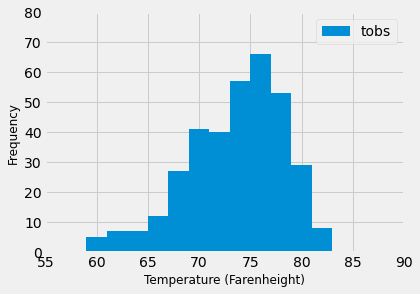

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date>=prev_year).all()
observ_df = pd.DataFrame(results,columns=['tobs'])
observ_df
observ_df.plot.hist(bins=12)
plt.tight_layout()
plt.ylim(0,80)
plt.xlim(55,90)
plt.xlabel('Temperature (Farenheight)',size=12)
plt.ylabel('Frequency',size=12)
print(observ_df.describe())

## Looking at this plot, we can infer that a vast majority of the observations were over 67 degrees. If you count up the bins to the right of 67 degrees, you will get about 325 days where it was over 67 degrees when the temperature was observed.

In [19]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start, end): # '%Y-%m-%d'
    min_temp = func.min(Measurement.tobs)
    avg_temp = func.avg(Measurement.tobs)
    max_temp = func.max(Measurement.tobs)
    starting_date = dt.strptime(start, '%Y-%m-%d')
    ending_date_date = dt.strptime(end, '%Y-%m-%d')
    output = session.query(min_temp,avg_temp,max_temp).\
        filter(Measurement.date.\
               between(starting_date,ending_date)).\
        all()
    return output

calc_temps()

TypeError: calc_temps() missing 2 required positional arguments: 'start' and 'end'

# Challenge

Adjust the number of bins in the plot to 5, and then adjust the number to 20. Take note of any differences in the plot caused by changing the number of bins.

In [ ]:
 def station_highest_numbers(highest, bins):
    results = session.query(Measurement.tobs).\
        filter(Measurement.station == highest).\
        filter(Measurement.date>=prev_year).all()
    observ_df = pd.DataFrame(results,columns=['tobs'])
    observ_df
    observ_df.plot.hist(bins=bins)
    plt.tight_layout()

In [ ]:
station_highest_numbers('USC00519281',5)

In [ ]:
station_highest_numbers('USC00519281',20)

In [ ]:
station_highest_numbers('USC00519281',30)